In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Read CSV
df_shark = pd.read_csv('Shark Tank India.csv', encoding='utf-8')
df_shark.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Ritesh Present,Amit Present,Guest Present
0,1,BluePineFoods,1,1,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
1,1,BoozScooters,1,2,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
2,1,HeartUpMySleeves,1,3,20-Dec-21,4-Feb-22,20-Dec-21,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
3,1,TagzFoods,2,4,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food and Beverage,...,Ashneer Grover,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
4,1,HeadAndHeart,2,5,20-Dec-21,4-Feb-22,21-Dec-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Children/Education,...,NaN,Ashneer Grover,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0


In [9]:
# Basic shape and head
print(df_shark.shape)
print(df_shark.head())

(634, 80)
   Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                      

In [10]:
# Normalize some key columns to numeric where relevant
num_cols = [
    'Original Ask Amount','Original Offered Equity','Valuation Requested','Total Deal Amount','Total Deal Equity',
    'Total Deal Debt','Debt Interest','Deal Valuation','Number of Sharks in Deal','Royalty Percentage','Royalty Recouped Amount',
    'Yearly Revenue','Monthly Sales','Gross Margin','Net Margin','EBITDA','Cash Burn','SKUs',
    'Namita Investment Amount','Vineeta Investment Amount','Anupam Investment Amount','Aman Investment Amount','Peyush Investment Amount','Ritesh Investment Amount','Amit Investment Amount','Guest Investment Amount'
]
for c in num_cols:
    if c in df_shark.columns:
        df_shark[c] = pd.to_numeric(df_shark[c], errors='coerce')

# High-level metrics
n_rows = len(df_shark)
seasons = sorted(df_shark['Season Number'].dropna().unique().tolist()) if 'Season Number' in df_shark.columns else []
unique_episodes = df_shark['Episode Number'].nunique() if 'Episode Number' in df_shark.columns else np.nan
pitches = df_shark['Pitch Number'].nunique() if 'Pitch Number' in df_shark.columns else np.nan
received_offer_rate = None
if 'Received Offer' in df_shark.columns:
    received_offer_rate = df_shark['Received Offer'].dropna().mean()
accepted_deal_rate = None
if 'Accepted Offer' in df_shark.columns:
    accepted_deal_rate = df_shark['Accepted Offer'].dropna().mean()

total_invested = df_shark['Total Deal Amount'].sum(skipna=True) if 'Total Deal Amount' in df_shark.columns else np.nan
median_valuation = df_shark['Deal Valuation'].median(skipna=True) if 'Deal Valuation' in df_shark.columns else np.nan

print(n_rows)
print(seasons)
print(unique_episodes)
print(pitches)
print(received_offer_rate)
print(accepted_deal_rate)
print(total_invested)
print(median_valuation)




634
[1, 2, 3, 4]
53
634
0.667192429022082
0.851063829787234
26284.91356
1250.0


In [11]:
# Top industries by count
top_industries = pd.Series(dtype='int')
if 'Industry' in df_shark.columns:
    top_industries = df_shark['Industry'].value_counts().head(10)
print(top_industries)


Industry
Food and Beverage               142
Beauty/Fashion                  127
Technology/Software              58
Medical/Health                   56
Manufacturing                    52
Lifestyle/Home                   43
Business Services                42
Children/Education               25
Vehicles/Electrical Vehicles     20
Fitness/Sports/Outdoors          19
Name: count, dtype: int64


In [12]:
# Shark participation counts: count of investments per shark
shark_amount_cols = [
    ('Namita Investment Amount','Namita'),
    ('Vineeta Investment Amount','Vineeta'),
    ('Anupam Investment Amount','Anupam'),
    ('Aman Investment Amount','Aman'),
    ('Peyush Investment Amount','Peyush'),
    ('Ritesh Investment Amount','Ritesh'),
    ('Amit Investment Amount','Amit'),
    ('Guest Investment Amount','Guest')
]
participation = {}
for col, name in shark_amount_cols:
    if col in df_shark.columns:
        participation[name] = (df_shark[col].fillna(0) > 0).sum()

participation_series = pd.Series(participation).sort_values(ascending=False)
print(participation_series)




Aman       140
Namita     114
Peyush     103
Anupam     101
Vineeta     89
Guest       63
Ritesh      52
Amit        35
dtype: int64


C:\Users\kkjeg\AppData\Local\Temp\ipykernel_6764\1492733257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_industries.values, y=top_industries.index, orient='h', palette='viridis')


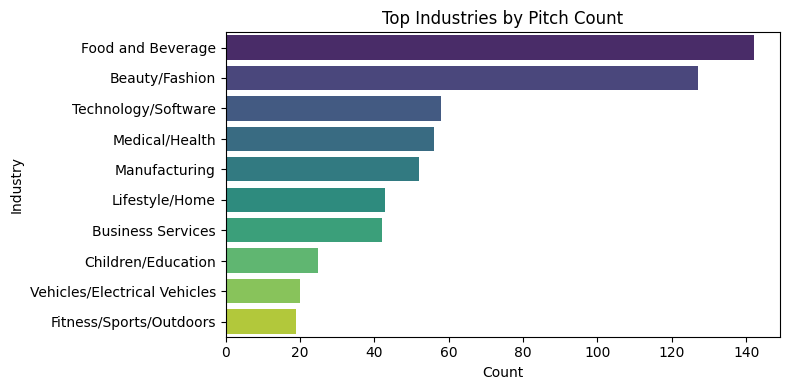

In [13]:
# Plot 1: Top industries
if not top_industries.empty:
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_industries.values, y=top_industries.index, orient='h', palette='viridis')
    plt.title('Top Industries by Pitch Count')
    plt.xlabel('Count')
    plt.ylabel('Industry')
    plt.tight_layout()
    plt.show()

C:\Users\kkjeg\AppData\Local\Temp\ipykernel_6764\1645072389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=participation_series.index, y=participation_series.values, palette='magma')


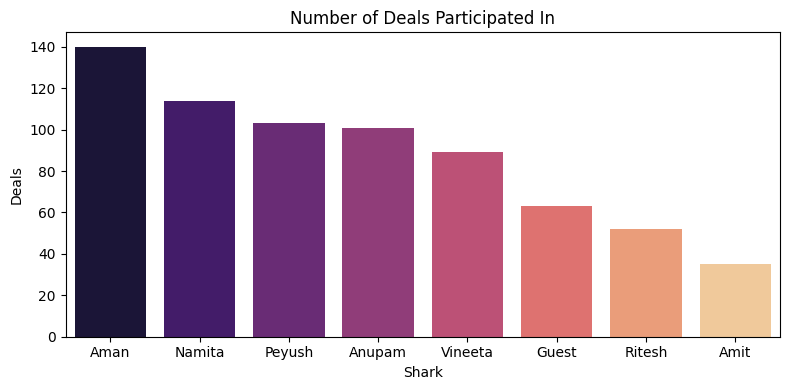

In [14]:
# Plot 2: Investment participation by shark
if len(participation_series) > 0:
    plt.figure(figsize=(8,4))
    sns.barplot(x=participation_series.index, y=participation_series.values, palette='magma')
    plt.title('Number of Deals Participated In')
    plt.xlabel('Shark')
    plt.ylabel('Deals')
    plt.tight_layout()
    plt.show()



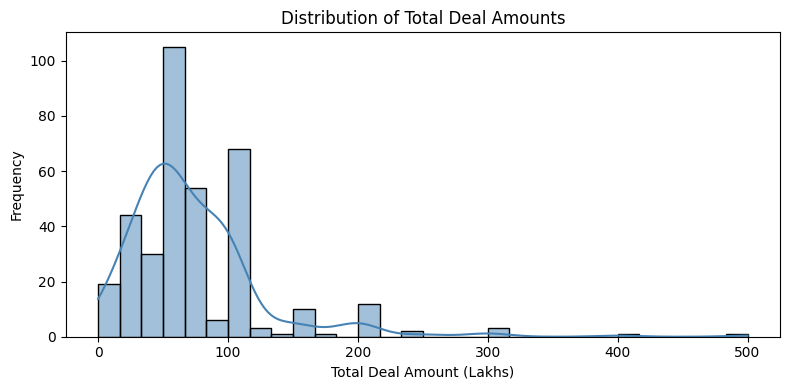

Loaded data, computed summaries, and plotted key charts


In [15]:
# Plot 3: Deal amounts distribution
if 'Total Deal Amount' in df_shark.columns and df_shark['Total Deal Amount'].notna().sum() > 0:
    plt.figure(figsize=(8,4))
    sns.histplot(df_shark['Total Deal Amount'].dropna(), bins=30, kde=True, color='steelblue')
    plt.title('Distribution of Total Deal Amounts')
    plt.xlabel('Total Deal Amount (Lakhs)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

print('Loaded data, computed summaries, and plotted key charts')